In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.compose import ColumnTransformer
import time

In [3]:
data = pd.read_csv('../data/X_train.csv')

In [21]:
data.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [23]:
data.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [11]:
data.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [25]:
print(data.shape)

(1285000, 14)


In [289]:
number_lines=data.shape[0]
time_interval=257
number_trajectory=number_lines/time_interval
print(f'Nombre de trajectoires : {number_trajectory}')


Nombre de trajectoire : 5000.0


In [295]:
idx = np.hstack((0,data[data.t==10].index.values+1))
idx.shape, data.t.min(), data.t.max() 

((4054,), 0.0, 10.0)

In [299]:
print(f'Nombre de trajectoires sans collision: {idx.shape[0]}')
print(f'Nombre de trajectoires avec collision: {number_trajectory-idx.shape[0]}')

Nombre de trajectoires sans collision: 4054
Nombre de trajectoires avec collision: 946.0


In [177]:
idx #tableau contenant les indices de tous les débuts de trajectoire

array([      0,     257,     514, ..., 1284486, 1284743, 1285000],
      dtype=int64)

In [167]:
data[data.t==10] #toutes les indices où une trajectoire se termine as

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
256,10.0,1.485476,1.222565,-0.250131,0.609230,1.048258,1.246830,0.859066,-0.050144,-2.533734,-2.469395,-0.608935,-0.559086,256
513,10.0,-6.620778,3.202247,-0.532136,0.287855,3.322901,-1.466720,-0.899632,-0.569780,3.297877,-1.735527,1.431768,0.281925,513
1027,10.0,-0.571494,-0.080697,0.179598,0.438129,0.027242,0.941225,-0.337390,-0.040624,0.544252,-0.860529,0.157792,-0.397505,1027
1284,10.0,0.723352,-1.444826,-0.251241,0.020408,-0.377848,0.467675,1.140102,-0.180309,-0.345504,0.977151,-0.888861,0.159901,1284
1798,10.0,-0.571648,1.095401,0.258019,-0.394434,0.243165,-0.222730,-0.308929,0.562921,0.328483,-0.872672,0.050909,-0.168487,1798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283971,10.0,-10.521958,1.545332,-1.056849,0.174263,5.248843,-0.664276,-0.864265,-0.033684,5.273115,-0.881057,1.921115,-0.140579,1283971
1284228,10.0,0.311324,0.118711,-0.869690,-0.581231,-0.435548,0.589852,0.531802,-0.142515,0.124224,-0.708563,0.337888,0.723746,1284228
1284485,10.0,-0.917666,-2.512581,-0.111736,-0.619204,-1.049653,-2.067444,0.035571,0.407810,1.967319,4.580025,0.076165,0.211394,1284485
1284742,10.0,-0.334211,-0.251147,-1.915656,-0.884303,-0.347886,-0.129399,2.967301,1.166792,0.682097,0.380546,-1.051645,-0.282489,1284742


3320


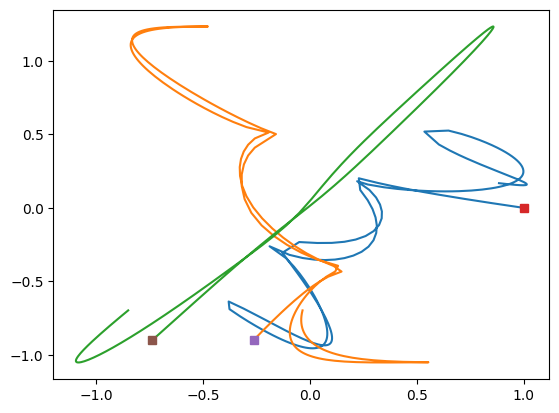

In [371]:
#visualiser une trajectoire random
k =np.random.randint(idx.shape[0])
print(k)
pltidx=range(idx[k],257+idx[k])
pltsquare = idx[k]
plt.plot(data.x_1[pltidx],data.y_1[pltidx])
plt.plot(data.x_2[pltidx],data.y_3[pltidx])
plt.plot(data.x_3[pltidx],data.y_3[pltidx])

plt.plot(data.x_1[pltsquare],data.y_1[pltsquare],'s')
plt.plot(data.x_2[pltsquare],data.y_3[pltsquare],'s')
plt.plot(data.x_3[pltsquare],data.y_3[pltsquare],'s')

In [365]:
data.iloc[1285]#afficher une ligne

t           0.000000
x_1         1.000000
y_1         0.000000
v_x_1       0.000000
v_y_1       0.000000
x_2        -0.471512
y_2         0.002251
v_x_2       0.000000
v_y_2       0.000000
x_3        -0.528488
y_3        -0.002251
v_x_3       0.000000
v_y_3       0.000000
Id       1285.000000
Name: 1285, dtype: float64